In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


# University of Strathclyde - MSc Artificial Intelligence and Applications
# CS814 - Artificial Intelligence for Autonomous Systems
# Practical 1 - MIU
 This notebook was first created first created 4th October 2019 by Barry Smart.


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [17]:
os.getcwd()

'c:\\Users\\Barry\\GitHub\\CS814\\practical1_miu'

In [18]:
os. chdir('c:\\Users\\Barry\\GitHub\\CS814\\practical1_miu')



In [19]:
from miu_next_states import next_states
from miu_extend_path import extend_path
from miu_breadth_first_search import breadth_first_search
from miu_depth_limited_dfs import depth_limited_dfs
from miu_iterative_deepening import iterative_deepening
from miu_compare_algorithms import compare_algorithms


## Part 1 - Next States
 The following calls illustrate the core "next_states" function working.

In [20]:
next_states("MI")


['MIU', 'MII']

In [21]:
next_states("MII")


['MIIU', 'MIIII']

In [22]:
next_states("MIIIIIIII")


['MIIIIIIIIU',
 'MIIIIIIIIIIIIIIII',
 'MUIIIII',
 'MIUIIII',
 'MIIUIII',
 'MIIIUII',
 'MIIIIUI',
 'MIIIIIU']

In [23]:
next_states("MUII")


['MUIIU', 'MUIIUII']

## Part 2 - Extend Path
 The following provide examples of the "extend_paths" function in action.

In [24]:
extend_path(["MI"])


[['MI', 'MIU'], ['MI', 'MII']]

In [25]:
extend_path(["MI", "MII", "MIIII"])


[['MI', 'MII', 'MIIII', 'MIIIIU'],
 ['MI', 'MII', 'MIIII', 'MIIIIIIII'],
 ['MI', 'MII', 'MIIII', 'MUI'],
 ['MI', 'MII', 'MIIII', 'MIU']]

# Part 3 - Breadth-First Search
 The following example shows the breadth-first search running with a reasonably challenging goal.

In [26]:
goal = "MUII"


In [27]:
def print_results(algorithm_name, goal_path, extend_path_counter, agenda_length, maximum_agenda_length):
    print(algorithm_name)
    print("Goal:", goal)
    print("Number of times extend paths called:", extend_path_counter)
    print("Maximum length of agenda:", maximum_agenda_length)
    print("Length of agenda when goal found:", agenda_length)
    print("Path to goal:\n", goal_path)


In [28]:
goal_path, extend_path_counter, agenda_length, maximum_agenda_length = breadth_first_search(goal)
print_results("Breadth-First Search", goal_path, extend_path_counter, agenda_length, maximum_agenda_length)


Breadth-First Search
Goal: MUII
Number of times extend paths called: 749
Maximum length of agenda: 5489
Length of agenda when goal found: 5489
Path to goal:
 ['MI', 'MII', 'MIIII', 'MIIIIIIII', 'MIIIIIIIIU', 'MUIIIIIU', 'MUIIUU', 'MUII']


# Part 4a - Depth Limited Depth-First Search
 Now running the depth limited DFS algorithm with the same goal as above.

In [29]:
goal_path, extend_path_counter, agenda_length, maximum_agenda_length = depth_limited_dfs(goal,8)
print_results("Depth Limited Depth-First Search", goal_path, extend_path_counter, agenda_length, maximum_agenda_length)


Depth Limited Depth-First Search
Goal: MUII
Number of times extend paths called: 383
Maximum length of agenda: 99
Length of agenda when goal found: 14
Path to goal:
 ['MI', 'MII', 'MIIII', 'MIIIIIIII', 'MIIIIIIIIU', 'MUIIIIIU', 'MUIIUU', 'MUII']


# Part 4b - Iterative Deepening
 Now running the depth limited DFS algorithm with the same goal as above.

In [30]:
goal_path, extend_path_counter, agenda_length, maximum_agenda_length = iterative_deepening(goal)
print_results("Iterative Deepening", goal_path, extend_path_counter, agenda_length, maximum_agenda_length)


Iterative Deepening
Goal: MUII
Number of times extend paths called: 216
Maximum length of agenda: 53
Length of agenda when goal found: 14
Path to goal:
 ['MI', 'MII', 'MIIII', 'MIIIIIIII', 'MIIIIIIIIU', 'MUIIIIIU', 'MUIIUU', 'MUII']


# Part 4c - Comparing Algorithms
 Now writing a more industrial grade set of functions to allow the different algorithms to be compared.

In [31]:
comparison_list = compare_algorithms(["MUII", "MIUIUIUIU", "MIIIIUIIIIU", "MUIUI", "MUIIUII", "MIIIII"], 10)


In [32]:
comparison_dataframe = pd.DataFrame.from_records(comparison_list)


In [33]:
comparison_dataframe


,Algorithm,Goal,Limit,Path,Path Length,Extend Calls,Agenda Length,Max Agenda Length
0,Breadth First Search,MUII,0,"[MI, MII, MIIII, MIIIIIIII, MIIIIIIIIU, MUIIII...",8,749,5489,5489
1,Depth Limited Depth First Search,MUII,10,"[MI, MII, MIIII, MIIIIIIII, MIIIIIIIIU, MUIIII...",8,33930,14,387
2,Iterative Deepening,MUII,10,"[MI, MII, MIIII, MIIIIIIII, MIIIIIIIIU, MUIIII...",8,216,14,53
3,Breadth First Search,MIUIUIUIU,0,"[MI, MIU, MIUIU, MIUIUIUIU]",4,6,5,5
4,Depth Limited Depth First Search,MIUIUIUIU,10,"[MI, MIU, MIUIU, MIUIUIUIU]",4,3,1,1
5,Iterative Deepening,MIUIUIUIU,10,"[MI, MIU, MIUIU, MIUIUIUIU]",4,7,1,1
6,Breadth First Search,MIIIIUIIIIU,0,"[MI, MII, MIIII, MIIIIU, MIIIIUIIIIU]",5,14,15,15
7,Depth Limited Depth First Search,MIIIIUIIIIU,10,"[MI, MII, MIIII, MIIIIU, MIIIIUIIIIU]",5,21,5,5
8,Iterative Deepening,MIIIIUIIIIU,10,"[MI, MII, MIIII, MIIIIU, MIIIIUIIIIU]",5,19,5,5
9,Breadth First Search,MUIUI,0,"[MI, MII, MIIII, MUI, MUIUI]",5,26,58,58


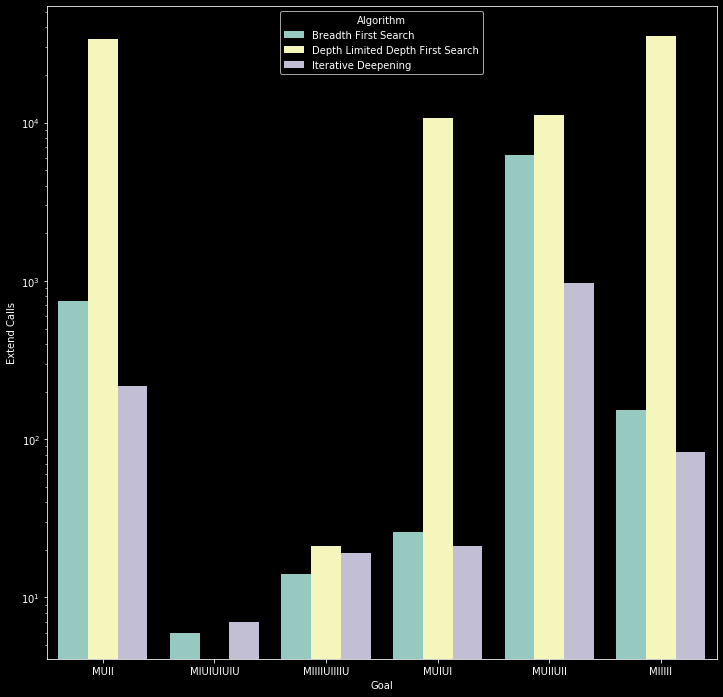

In [34]:
# Initialize figure and ax
fig, ax = plt.subplots(figsize=(12,12))
# Set the scale of the y-axes to be a log scale
ax.set(yscale="log")
# Create a regplot
sns.barplot(x="Goal", y="Extend Calls", hue="Algorithm", data=comparison_dataframe, ax=ax)


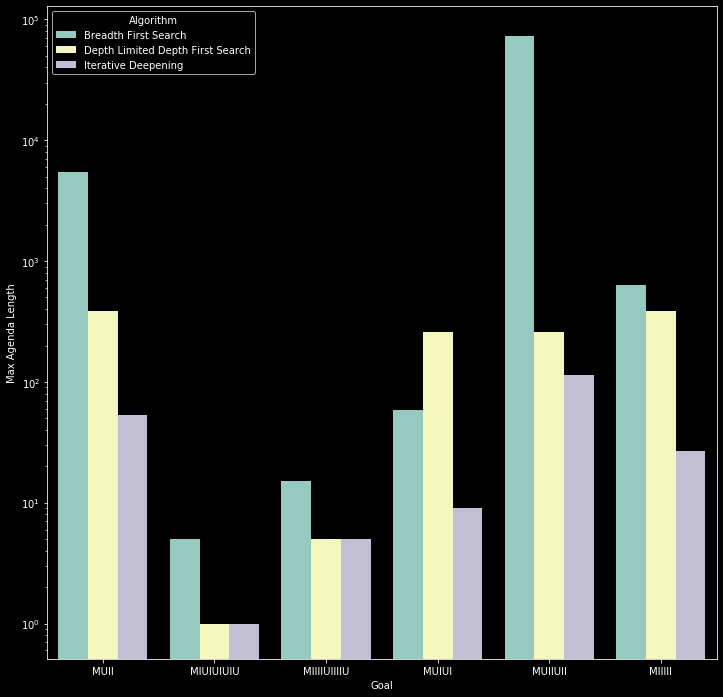

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
# Set the scale of the y-axes to be a log scale
ax.set(yscale="log")
# Create a regplot
sns.barplot(x="Goal", y="Max Agenda Length", hue="Algorithm", data=comparison_dataframe, ax=ax)


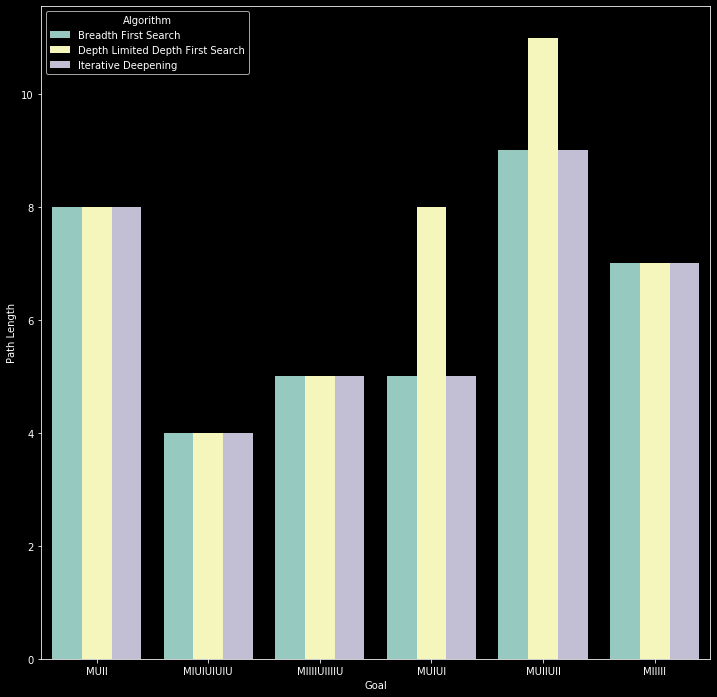

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
# Create a regplot
sns.barplot(x="Goal", y="Path Length", hue="Algorithm", data=comparison_dataframe, ax=ax)
